In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd gdrive/MyDrive/Colab Notebooks/8ens/

/content/gdrive/MyDrive/Colab Notebooks/8ens


In [ ]:
import numpy as np
# import timeit
import random
import copy
from time import time
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%config InlineBackend.figure_format = 'svg' 
%matplotlib inline 
from sklearn.model_selection import train_test_split

import ensembles as ens

OK!


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/8ens/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
# data.info()

In [ ]:
# data.dtypes

In [ ]:
y = data['price'].values
data['date'] = pd.to_datetime(data['date'])

data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

data = data.drop(['price', 'id', 'date'], axis=1)

X = data.values

In [ ]:
data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day,month,year
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,13,10,2014
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,9,12,2014
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,25,2,2015
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,9,12,2014
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,18,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,21,5,2014
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,23,2,2015
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,23,6,2014
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,16,1,2015


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15129, 21), (6484, 21), (15129,), (6484,))

In [ ]:
parameters = {
    'X': X_train,
    'y': y_train,
    'X_val': X_test,
    'y_val': y_test
}

In [ ]:
def plot_graph(X, Y1, Y2, time = None, label_Y1 = "train", 
               label_Y2 = "test", title="", marker='.',
               xlabel = "", ylabel = "RMSE", 
               xlog = False, ylog = False, 
               color1 = 'green', color2 = 'deeppink', color3 = 'darkviolet', ylim = False):
  
    fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(18, 5))
    fig.suptitle(title, fontsize=13)

    minimum = np.argmin(Y2)
    ticks = list(range(0, len(X), 1)) # без последнего элемента
    none_coor = len(X) + 5
    if None in X:
        ax_1.set_xticks(ticks + [none_coor])
        ax_2.set_xticks(ticks + [none_coor])
        ticks = ticks + ['$\infty$']
        ax_1.set_xticklabels(ticks)
        ax_2.set_xticklabels(ticks)
    elif 15 < len(X) < 100:
        ticks = ticks + [len(X)]
        ax_1.set_xticks(ticks)
        ax_2.set_xticks(ticks)

    if None in X:
        ax_1.plot(X[:-1] + [none_coor], Y1, marker=marker, label = label_Y1, color = color1)
        ax_2.plot(X[:-1] + [none_coor], time, marker=marker, color = color3)
        ax_1.plot(X[:-1] + [none_coor], Y2, marker=marker, label = label_Y2, color = color2)
        ax_1.plot((X[:-1] + [none_coor])[minimum], Y2[minimum], marker='o', color = 'darkblue',
                  label='Минимум' + "\nX = " + str(ticks[minimum+1]) + "\nY = " + str("{0:8.4f}".format(Y2[minimum])))
    else:
        ax_1.plot(X, Y1, marker=marker, label = label_Y1, color = color1)
        ax_2.plot(X, time, marker=marker, color = color3)
        ax_1.plot(X, Y2, marker=marker, label = label_Y2, color = color2)
        ax_1.plot(X[minimum], Y2[minimum], marker='o', color = 'darkblue', 
                 label='Минимум' + "\nX = " + str(X[minimum]) + "\nY = " + str("{0:8.4f}".format(Y2[minimum])))

    ax_1.set_title('Зависимость RMSE от ' + xlabel, fontsize=13)
    ax_2.set_title('Зависимость времени работы от ' + xlabel, fontsize=13)
    ax_1.set_xlabel(xlabel, fontsize=12)
    ax_1.set_ylabel(ylabel, fontsize=12)
    ax_2.set_xlabel(xlabel, fontsize=12)
    ax_2.set_ylabel("Время работы алгоритма (сек)", fontsize=12)

    # ax_1.xaxis.set_major_locator(MaxNLocator(integer=True))
    # ax_2.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax_1.legend()
    ax_1.grid(True) 
    ax_2.grid(True) 

    if xlog:
        ax_1.set_xscale('log')
    if ylog:
        ax_1.set_yscale('log')
    # plt.show()

# Случайный лес

### Количество деревьев в ансамбле

In [ ]:
RanFor = ens.RandomForestMSE(n_estimators = 1000)
loss_train1, loss_val1, times1 = RanFor.fit(**parameters)

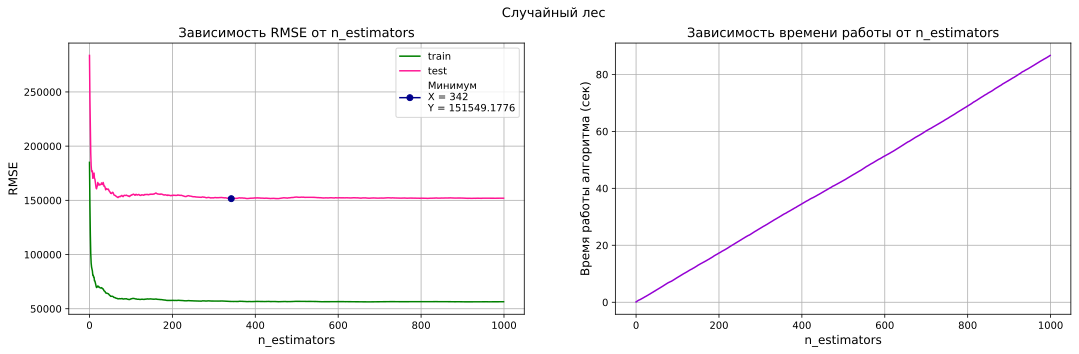

In [ ]:
plot_graph(np.arange(1000), loss_train1, loss_val1, times1, 
           title = "Случайный лес", marker = None, xlabel = "n_estimators")
plt.savefig('{}.{}'.format('S_1', 'pdf'), fmt='pdf', bbox_inches='tight')

### Размерность подвыборки признаков для одного дерева

In [ ]:
feature2 = np.arange(1, X_train.shape[1] + 1)
loss_train2 = [] 
loss_val2   = []
times2      = []

for f in feature2:
    RanFor = ens.RandomForestMSE(n_estimators = 350, feature_subsample_size = f)
    start_time = time()
    RanFor.fit(X_train, y_train)
    times2.append(time() - start_time)
    loss_train2.append(ens.RMSE(y_train, RanFor.predict(X_train)))
    loss_val2.append(ens.RMSE(y_test, RanFor.predict(X_test)))

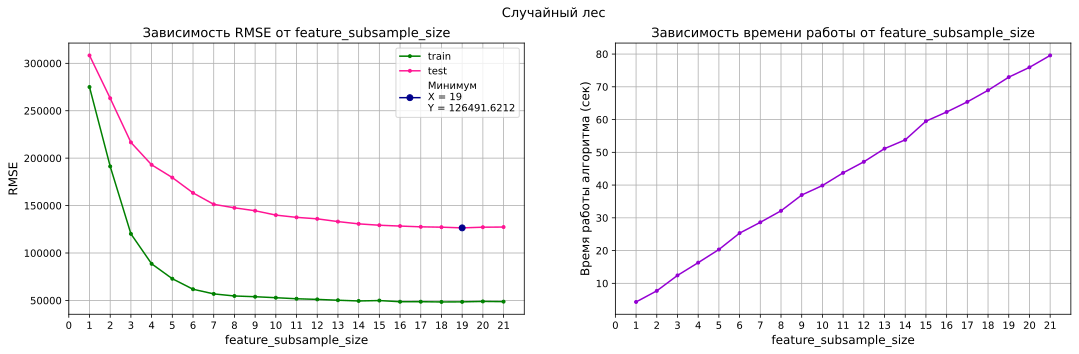

In [ ]:
plot_graph(feature2, loss_train2, loss_val2, times2, 
           title = "Случайный лес", marker = '.', xlabel = "feature_subsample_size")
plt.savefig('{}.{}'.format('S_2', 'pdf'), fmt='pdf', bbox_inches='tight')

### Максимальная глубина дерева (дополнительно разберите случай, когда глубина неограничена)

In [ ]:
depth3 = list(np.arange(1, 21)) + [None]
loss_train3 = [] 
loss_val3   = []
times3      = []

for d in depth3:
    RanFor = ens.RandomForestMSE(n_estimators = 300, feature_subsample_size = 18, max_depth = d)
    start_time = time()
    RanFor.fit(X_train, y_train)
    times3.append(time() - start_time)
    loss_train3.append(ens.RMSE(y_train, RanFor.predict(X_train)))
    loss_val3.append(ens.RMSE(y_test, RanFor.predict(X_test)))

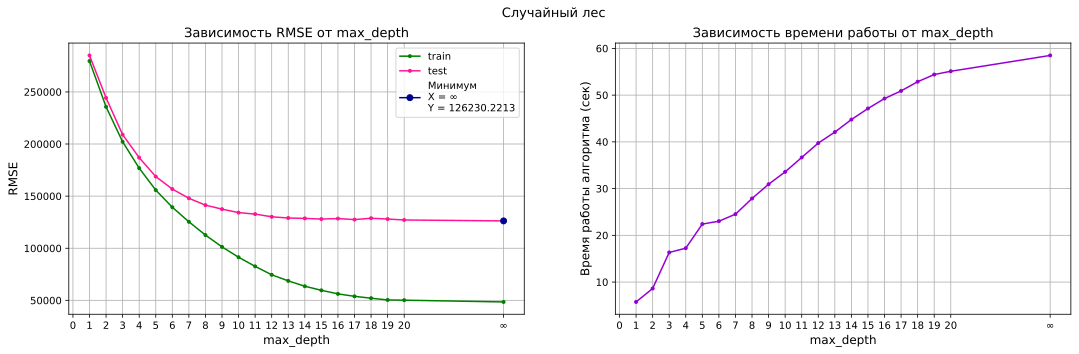

In [ ]:
plot_graph(depth3, loss_train3, loss_val3, times3, 
           title = "Случайный лес", marker = '.', xlabel = "max_depth")
plt.savefig('{}.{}'.format('S_3', 'pdf'), fmt='pdf', bbox_inches='tight')